<a href="https://colab.research.google.com/github/akmaleache/Quora/blob/master/4_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
# from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [ ]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

In [ ]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [ ]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [ ]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [ ]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [ ]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.199996000079998,0.166663888935184,0.0,0.0,0.14285510206997,0.0999990000099999,0.0,0.0,3.0,8.5,...,-0.452613651752472,15.652570605278,6.08213365077972,-11.8397651314735,13.1632919311523,-2.98961134254932,-22.7671056985855,-0.55659094452858,16.7820047736168,20.3098403215408
2,0.399992000159997,0.399992000159997,0.499987500312492,0.499987500312492,0.444439506227709,0.444439506227709,0.0,0.0,0.0,9.0,...,-7.29706252366304,8.17464561760426,11.8678730130196,-0.180742904543877,-7.7285645082593,-1.18125408887863,-10.2087883651257,1.95615618489683,5.9711550520733,-0.634018301963806
3,0.833319444675922,0.714275510349852,0.999983333611106,0.857130612419823,0.687495703151855,0.687495703151855,0.0,1.0,0.0,16.0,...,10.6274425089359,8.40339290164411,14.16905092448,-14.7492953687906,13.0176268517971,15.6888161092065,-26.4774019122124,24.7521114945412,14.29726113379,0.945210464298725
4,0.0,0.0,0.599988000239995,0.499991666805553,0.249997916684028,0.230767455634957,0.0,0.0,1.0,12.5,...,9.43481918051839,47.0162477493286,6.11483122035861,-9.12068559974432,-3.70159254875034,-6.60001696646214,-26.1024898421019,13.254497602582,10.0541534200311,-6.71233975887299
5,0.749981250468738,0.749981250468738,0.499987500312492,0.499987500312492,0.624992187597655,0.624992187597655,1.0,0.0,0.0,8.0,...,-0.158434137701988,13.7061135396361,6.35377380251884,-7.79693192709237,7.42785215843469,0.602214589715004,-17.1489275898784,-1.66515278816223,4.06413406133652,3.87387558817863


<h2> 4.2 Converting strings to numerics </h2>

In [ ]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [ ]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

<h2> 4.3 Random train test split( 70:30) </h2>

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [ ]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 794)
Number of data points in test data : (30000, 794)


In [ ]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6324857142857143 Class 1:  0.36751428571428574
---------- Distribution of output variable in train data ----------
Class 0:  0.3675 Class 1:  0.3675


In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.887242646958


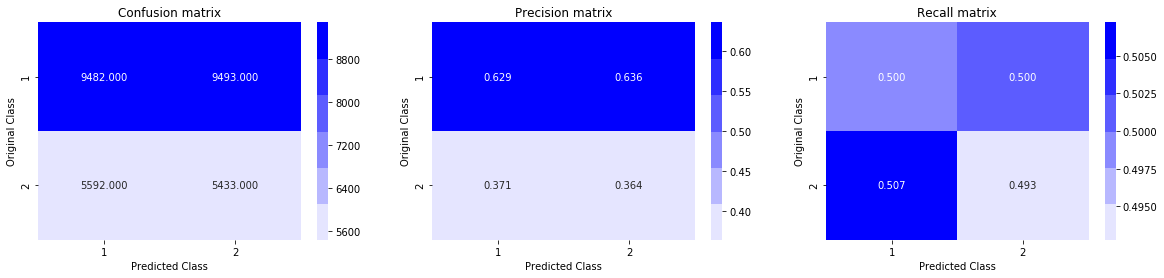

In [ ]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.592800211149
For values of alpha =  0.0001 The log loss is: 0.532351700629
For values of alpha =  0.001 The log loss is: 0.527562275995
For values of alpha =  0.01 The log loss is: 0.534535408885
For values of alpha =  0.1 The log loss is: 0.525117052926
For values of alpha =  1 The log loss is: 0.520035530431
For values of alpha =  10 The log loss is: 0.521097925307


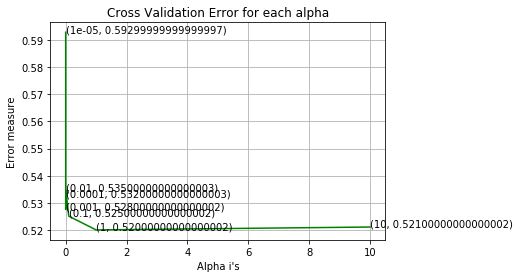

For values of best alpha =  1 The train log loss is: 0.513842874233
For values of best alpha =  1 The test log loss is: 0.520035530431
Total number of data points : 30000


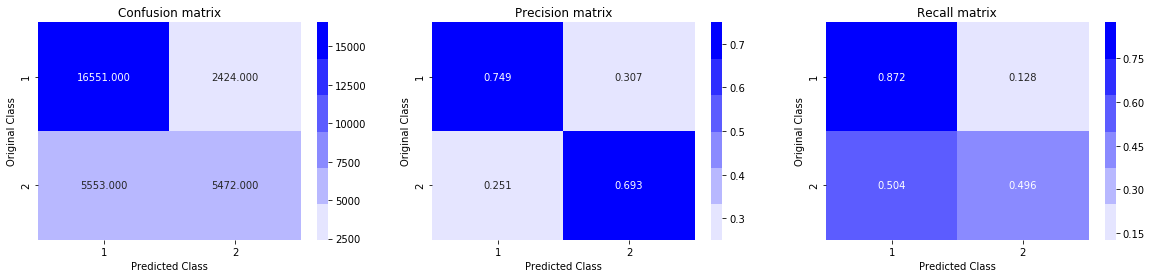

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.657611721261
For values of alpha =  0.0001 The log loss is: 0.489669093534
For values of alpha =  0.001 The log loss is: 0.521829068562
For values of alpha =  0.01 The log loss is: 0.566295616914
For values of alpha =  0.1 The log loss is: 0.599957866217
For values of alpha =  1 The log loss is: 0.635059427016
For values of alpha =  10 The log loss is: 0.654159467907


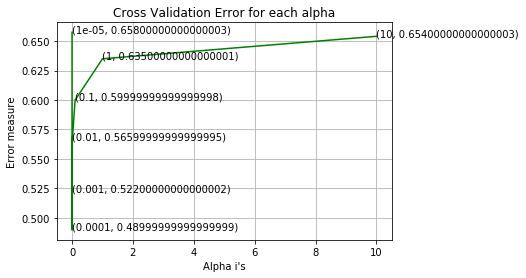

For values of best alpha =  0.0001 The train log loss is: 0.478054677285
For values of best alpha =  0.0001 The test log loss is: 0.489669093534
Total number of data points : 30000


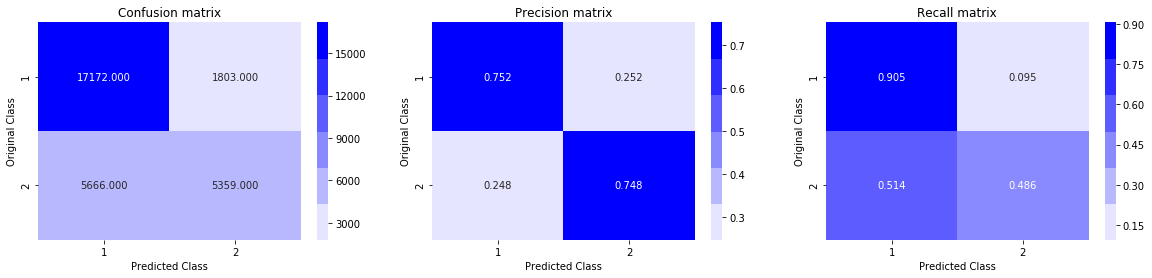

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [ ]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684819	valid-logloss:0.684845
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.61583	valid-logloss:0.616104
[20]	train-logloss:0.564616	valid-logloss:0.565273
[30]	train-logloss:0.525758	valid-logloss:0.52679
[40]	train-logloss:0.496661	valid-logloss:0.498021
[50]	train-logloss:0.473563	valid-logloss:0.475182
[60]	train-logloss:0.455315	valid-logloss:0.457186
[70]	train-logloss:0.440442	valid-logloss:0.442482
[80]	train-logloss:0.428424	valid-logloss:0.430795
[90]	train-logloss:0.418803	valid-logloss:0.421447
[100]	train-logloss:0.41069	valid-logloss:0.413583
[110]	train-logloss:0.403831	valid-logloss:0.40693
[120]	train-logloss:0.398076	valid-logloss:0.401402
[130]	train-logloss:0.393305	valid-logloss:0.396851
[140]	train-logloss:0.38913	valid-logloss:0.392952
[150]	train-logloss:0.385469	valid-logloss:0.389521
[160]	train-logloss:0.382327	vali

Total number of data points : 30000


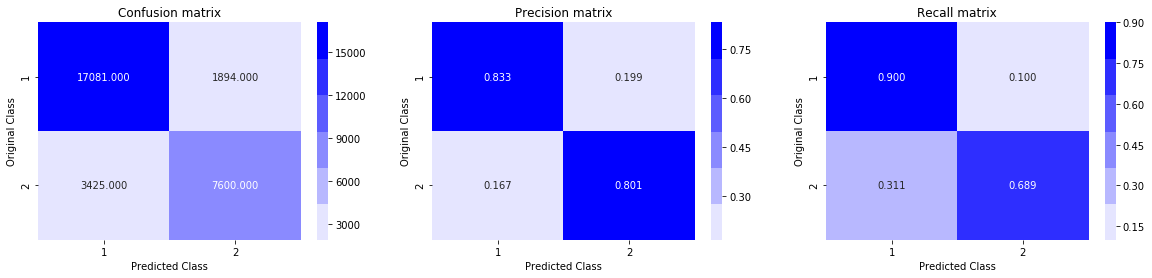

In [ ]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Perform hyperparameter tuning  of XgBoost models using RandomsearchCV with vectorizer as TF-IDF W2V  to reduce the log-loss.



# Implementing Decomposition attention paper for predicting if both the questions are similar

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC, Accuracy
from tensorflow.keras.layers import LSTM, Embedding, Flatten, Dense, concatenate, Dropout,LeakyReLU, BatchNormalization, Activation, Conv1D, Softmax, Add
from tensorflow.keras.initializers import he_normal,he_uniform, GlorotNormal,GlorotUniform, Constant
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model,Input
from tensorflow import keras
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
# loading data
df = pd.read_csv('/content/drive/MyDrive/Quora project/Quora/train.csv')
df = df[['question1', 'question2','is_duplicate']]
df

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,What is one coin?,What's this coin?,0
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [41]:
# removing numbers
df['question1'] = df['question1'].apply(lambda x : x.lower())
df['question2'] = df['question2'].apply(lambda x : x.lower())

# making all sentence to lower case
df['question1'] = df['question1'].apply(lambda x : x.lower())
df['question2'] = df['question2'].apply(lambda x : x.lower())

# prepending "NULL" in front of each sentence as mention in paper
df['question1'] = df['question1'].apply(lambda x : 'NULL '+x)
df['question2'] = df['question2'].apply(lambda x : 'NUll '+x)

AttributeError: ignored

In [7]:
len(df['question1'][1].split())

9

In [6]:
# installing embedding layer
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip "/content/glove.6B.zip" -d "/content/data"

--2021-07-08 06:26:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-07-08 06:26:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-07-08 06:26:18--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [7]:
tk = Tokenizer()
tk.fit_on_texts(df['question1']+' '+df['question2'])
vocab_size = len(tk.word_index)+1

max_len = 20
q1_train = pad_sequences(tk.texts_to_sequences(df['question1']), maxlen=max_len,padding='post')
q2_train = pad_sequences(tk.texts_to_sequences(df['question2']),maxlen= max_len,padding='post')
print(q1_train)
print(q2_train)
print(df['question1'].values)
print(df.question2.values)

[[ 2  3  5  1  4  7  4  8  9 10  6 11 12  6 18  0  0  0  0  0]
 [ 2  3  5  1 19 20 13 14 15 16 17  0  0  0  0  0  0  0  0  0]]
[[ 2  3  5  1  4  7  4  8  9 10  6 11 12  0  0  0  0  0  0  0]
 [ 2  3 21 22 23  1 24 25 26  1 13 14 15 16 17 27  0  0  0  0]]
['NULL what is the step by step guide to invest in share market in india?'
 'NULL what is the story of kohinoor (koh-i-noor) diamond?']
['NUll what is the step by step guide to invest in share market?'
 'NUll what would happen if the indian government stole the kohinoor (koh-i-noor) diamond back?']


In [8]:
glove_dim = 100

embeddings_index = dict()
f = open('/content/data/glove.6B.100d.txt')
for line in f:
    values = line.split()
    if values[0] in tk.word_index:# here we get word_index from above fitted tokeniser 
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
print('lenght of vocab',len(embeddings_index.keys()))


# create a weight matrix for words in training docs
oov = set()
embedding_matrix = np.zeros((vocab_size, glove_dim))
for word, i in tk.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector
embedding_matrix.shape

lenght of vocab 27


(28, 100)

In [40]:
embd1(q2_train[0])._keras_mask

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False])>

In [39]:
Dense(50,activation='relu')(embd1(q1_train[0]))._keras_mask

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False])>

In [ ]:
a_.shape

TensorShape([20, 100])

In [9]:
embd1 = Embedding(vocab_size,output_dim=100, weights=[embedding_matrix],input_length=max_len, mask_zero = True,trainable=False, name = 'emd1')
d1 = Dense(50,activation='relu',name = 'dense')
d2 = Dense(50,activation='relu',name = 'B')
add = Add()
soft1 = tf.keras.layers.Softmax(axis=-1)
soft2 = tf.keras.layers.Softmax(axis=-2)


In [39]:
q1_train[2].shape

IndexError: ignored

In [35]:
## Attend
# lets try dot product of two output from 

a_ = embd1(q1_train[0])
b_ = embd1(q2_train[0])
f_a = d1(a_)
f_b = d1(b_)
f_a = f_a[:tf.where(f_a._keras_mask==True)[-1][0]+1]
f_b = f_b[:tf.where(f_b._keras_mask==True)[-1][0]+1]


e_ij = f_a @ tf.transpose(f_b)

sof1 = soft1(e_ij) 
sof2 = soft2(e_ij)

B_i = tf.transpose(sof1) @ tf.boolean_mask(a_, a_._keras_mask)
A_j = sof2 @ tf.boolean_mask(b_, b_._keras_mask)

v1 = tf.concat([a_,B_i],0)

v2 = tf.concat([b_,A_j],0)

x1 = d2(v1)
x2 = d2(v2)










# B_sum = [sum(e_ij[0][i][:]) for i in range(e_ij.shape[1])]
# A_sum = [sum(e_ij[0][:][j]) for j in range(0,e_ij.shape[2])]


# B_i = tf.convert_to_tensor([sum([(e_ij[0][y][x]/B_sum[y])*embdx2[y] for x in range(0,e_ij.shape[2])])  for y in range(0,len(B_sum))])
# A_j = tf.convert_to_tensor([sum([(e_ij[0][x][y]/A_sum[y])*embdx1[y] for x in range(0,e_ij.shape[1])])  for y in range(0,len(A_sum))])

TensorShape([33, 50])

In [200]:
a_._keras_mask

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False])>

In [57]:
# @tf.function
# def compute_Bi_Aj(x1,x2):
#     #explicitly removing masked input

#     x1 = tf.convert_to_tensor(x1[:tf.where(x1._keras_mask==True)[-1][0]+1])
#     x2 = tf.convert_to_tensor(x2[:tf.where(x2._keras_mask==True)[-1][0]+1])

#     # computing weighted matrix e_ij
#     # e_ij = x1 @ tf.transpose(x2,perm = [0,2,1])
#     # print(e_ij.shape)

    #computing B_i and A_j and returning it to next layer compare



#     # B_sum = [sum(e_ij[0][i][:]) for i in range(e_ij.shape[1])]
#     # A_sum = [sum(e_ij[0][:][j]) for j in range(0,e_ij.shape[2])]


#     # B_i = tf.convert_to_tensor([sum([(e_ij[0][y][x]/B_sum[y])*embdx2[y] for x in range(0,e_ij.shape[2])])  for y in range(0,len(B_sum))])
#     # A_j = tf.convert_to_tensor([sum([(e_ij[0][x][y]/A_sum[y])*embdx1[y] for x in range(0,e_ij.shape[1])])  for y in range(0,len(A_sum))])


    return(x1,x2)

In [10]:
class atten(tf.keras.layers.Layer):    
    def __init__(self,vocab_size,output_dim,max_len, estimator,name="attention"):
        super().__init__(name=name)
        self.vocab_size = vocab_size
        self.output_dim = output_dim
        self.max_len = max_len
        self.estimator = estimator

    
    def build(self, input_shape):
        self.embd = Embedding(self.vocab_size, self.output_dim, weights=[embedding_matrix],input_length=self.max_len , mask_zero = True,trainable=False, name = 'emd1')
        self.f = Dense(self.estimator,activation='relu',name = 'F')
        self.softmax_a = Softmax(axis = -2)
        self.softmax_b = Softmax(axis = -1)

    def call(self, X):
        # here X will a list of two elements
        
        x1,x2 = X[0], X[1] 
        emb1 = self.embd(x1)
        emb2 = self.embd(x2)

        x1 = self.f(emb1)
        x2 = self.f(emb2)

        x1 = x1[:(tf.where(x1._keras_mask==True)[-1][0])+1]
        x2 = x2[:(tf.where(x2._keras_mask==True)[-1][0])+1]

        e_ij = x1 @ tf.transpose(x2, perm=[0, 2, 1])
        sof1 = self.softmax_a(e_ij) 
        sof2 = self.softmax_b(e_ij)

        
        B_i = tf.transpose(sof1,perm=[0,2,1]) @ tf.boolean_mask(emb1, emb1._keras_mask)
        A_j = sof2 @ tf.boolean_mask(emb2, emb2._keras_mask)

        #concate a_ and B_i then b_ and A_j
        out1 = tf.concat([B_i,emb1], 1)# 1 becaise 0 have batch size none
        out2 = tf.concat([A_j,emb2],1)

        print(out1)
        

        

        
        return (out1,out2)

In [11]:
@tf.function
def summate(x1, x2):
    x1 = tf.reduce_sum(x1,1)
    x2 = tf.reduce_sum(x2,1)
    return (x1,x2)

In [12]:
class compare(tf.keras.layers.Layer):
    def __init__(self, name = 'compare'):
        super().__init__(name = name)
        self.g = Dense(50,activation='relu',name = 'G')
    
    def call(self, X):
        x1,x2 = X[0],X[1]

        x1 = self.g(x1)
        x2 = self.g(x2)
        # print(x2.shape)

        x1,x2 = summate(x1,x2)

        # self.h(output)

        return (x1,x2)

    

In [13]:
class aggregate(tf.keras.layers.Layer):
    def __init__(self, name = 'aggregate'):
        super().__init__(name = name)
        self.h = Dense(2,activation='sigmoid',name = 'H')
    
    def call(self, X):
        x1,x2 = X[0],X[1]

        output = tf.concat([x1,x2],1)
        output = self.h(output)


        return (output)

    

In [14]:
output_dim = 100
estimator = 50

In [16]:
atn = atten(vocab_size,output_dim,max_len,estimator)
com = compare()
agg = aggregate()

In [43]:
q1_train.shape[1]

20

In [37]:
# creating dummy model to check if we can build graph of above complex graph
x1_input = Input(shape = q1_train.shape, name= 'pair_1')
x2_input = Input(shape = q2_train.shape,name = 'pair_2')

# vi,vj = atn([x1_input,x2_input])
# x1,x2 = com([vi,vj])
# output = agg([x1,x2])





emb1= embd1(x1_input)
emb2 = embd1(x2_input)

x1 = d1(emb1)
x2 = d1(emb2)

x1 = x1[:(tf.where(x1._keras_mask==True)[-1][0])+1]
x2 = x2[:(tf.where(x2._keras_mask==True)[-1][0])+1]



e_ij = x1 @ tf.transpose(x2, perm = [0,2,1])

# sof1 = soft1(e_ij) 
# sof2 = soft2(e_ij)
# B_i = tf.transpose(sof1, perm=[0,2,1]) @ tf.boolean_mask(emb1, emb1._keras_mask)
# A_j = sof2 @ tf.boolean_mask(emb2, emb2._keras_mask)














ValueError: ignored

In [18]:
model = Model(inputs=[x1_input,x2_input], outputs = [output] )
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
pair_1 (InputLayer)             [(None, 20)]         0                                            
__________________________________________________________________________________________________
pair_2 (InputLayer)             [(None, 20)]         0                                            
__________________________________________________________________________________________________
attention (atten)               ((None, 40, 100), (N 7850        pair_1[0][0]                     
                                                                 pair_2[0][0]                     
__________________________________________________________________________________________________
compare (compare)               ((None, 50), (None,  5050        attention[0][0]              

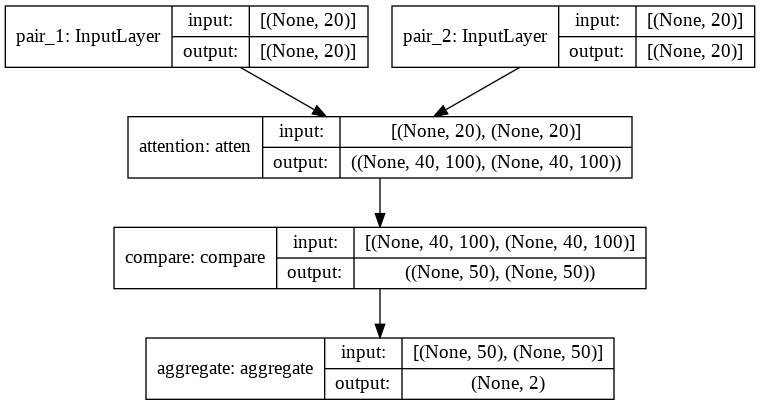

In [19]:
plot_model(model,show_shapes=True)

In [33]:
def auroc(y_true, y_pred):
 return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
model.fit(x = [q1_train,q2_train],batch_size=1)

Tensor("model/attention/concat:0", shape=(1, 40, 100), dtype=float32)


ValueError: ignored

In [ ]:
# now compute Bj and Ai 
B_sum = [sum(e_ij[i][:]) for i in range(0,e_ij.shape[0])]
A_sum = [sum(e_ij[:][j]) for j in range(0,e_ij.shape[1])]
A_sum

[<tf.Tensor: shape=(), dtype=float32, numpy=46.48449>,
 <tf.Tensor: shape=(), dtype=float32, numpy=71.26536>,
 <tf.Tensor: shape=(), dtype=float32, numpy=59.27954>,
 <tf.Tensor: shape=(), dtype=float32, numpy=64.78312>,
 <tf.Tensor: shape=(), dtype=float32, numpy=51.609085>,
 <tf.Tensor: shape=(), dtype=float32, numpy=67.30914>,
 <tf.Tensor: shape=(), dtype=float32, numpy=51.609085>,
 <tf.Tensor: shape=(), dtype=float32, numpy=37.796688>,
 <tf.Tensor: shape=(), dtype=float32, numpy=71.94593>,
 <tf.Tensor: shape=(), dtype=float32, numpy=60.3913>,
 <tf.Tensor: shape=(), dtype=float32, numpy=68.386314>,
 <tf.Tensor: shape=(), dtype=float32, numpy=63.741604>]

In [ ]:
# till here i was checking how the mask_zero works in embedding
B_i = [sum([(e_ij[y][x]/B_sum[y])*b_[y] for x in range(0,e_ij.shape[1])])  for y in range(0,len(B_sum))] 
A_j = [sum([(e_ij[x][y]/A_sum[y])*a_[y] for x in range(0,e_ij.shape[0])])  for y in range(0,len(A_sum))] 


[<tf.Tensor: shape=(100,), dtype=float32, numpy=
 array([ 0.079432  , -0.14053999, -0.10461999, -0.36259   , -0.22720999,
        -0.13612   ,  0.74755   ,  0.32808998,  0.54364   ,  0.12090999,
        -0.53579   , -0.09385199, -0.1253    ,  0.0075018 ,  0.54401994,
        -0.51891   ,  0.34595996,  1.3305999 ,  1.0153    ,  0.31238997,
         0.16273999, -0.026524  ,  0.7394899 ,  0.5574    ,  1.1129    ,
        -0.44905   ,  1.0968    ,  0.73695993, -0.44727996,  0.032219  ,
         1.1975999 ,  0.059368  , -0.37852997, -0.21233   ,  0.13509998,
        -0.34380996,  0.48377   ,  0.017526  , -0.46030995, -0.77044   ,
        -0.85068005,  0.30326995,  0.11416999, -0.25013   ,  0.014417  ,
        -0.05347   , -0.30477   ,  0.40744   , -1.4463001 ,  0.85098994,
         0.66363   ,  0.0049562 ,  0.57099   ,  0.27496   ,  0.0087559 ,
        -0.84858996,  0.74671996,  0.51043004,  0.18724   , -0.012529  ,
        -0.42562002, -0.84411997, -0.50242   ,  0.016912  ,  0.41224   ,
  

## from here on i will make three class for atten, compare, and 
